In [1]:
import nltk
import re
from nltk import word_tokenize
import urllib2


### 1.  The Strange Case of Dr. Jekyll and Mr. Hyde

In [2]:
url = "http://www.gutenberg.org/files/43/43-0.txt"

#open and read the file
response = urllib2.urlopen(url)
raw = response.read().decode('utf8')

In [3]:
#find the beginning
raw.find("STORY OF THE DOOR")

788

In [4]:
#find the end
raw.find("End of the Project Gutenberg EBook")

141823

In [5]:
#cut out non book portions
raw = raw[788:141823]

In [6]:
raw.find("STORY OF THE DOOR")

0

In [7]:
#convert to tokens
tokens = word_tokenize(raw)

### 2. How many total unique words are in the corpus?  

In [8]:
#normalize to lowercase text
words = [w.lower() for w in tokens]

In [9]:
#remove non-alphanumeric characters, this will include the removal of contractions and names
alpha = [w for w in words if w.isalpha()]
len(alpha)

24667

In [10]:
#use a stemmer to find the root words
porter = nltk.PorterStemmer()
stem = [porter.stem(t) for t in alpha]

In [11]:

#use set to find unique words
uni = len(set(stem))
print "there are %d unique words in the corpus" %uni

there are 2982 unique words in the corpus


### 3.  Taking the most common words, how many unique words represent half of the total words in the corpus?

In [12]:
fd = nltk.FreqDist(stem)



In [13]:
import operator

fd_val = sorted(fd.values(), reverse=True)
fd_val[:10]

[1602, 946, 935, 639, 626, 563, 467, 422, 368, 362]

In [14]:
count=0
total=0
for freq in fd_val:
    if total <= len(alpha)/2:
        total += freq
        count += 1
print "%d words make up half of the total words in the corpus" %count
            
        

53 words make up half of the total words in the corpus


### 4.  Identify the 200 highest frequency words in this corpus.

In [15]:
#use operator to sort based on the value pair (itemgetter 1 versus 2)
sorted_fd = sorted(fd.items(), key=operator.itemgetter(1), reverse=True)

In [16]:
#the most common words are the usual suspects
print sorted_fd[:200]

[(u'the', 1602), (u'and', 946), (u'of', 935), (u'to', 639), (u'a', 626), (u'i', 563), (u'wa', 467), (u'in', 422), (u'he', 368), (u'that', 362), (u'it', 359), (u'my', 300), (u'hi', 285), (u'with', 252), (u'had', 244), (u'you', 213), (u'as', 192), (u'but', 177), (u'for', 170), (u'at', 169), (u'on', 149), (u'be', 136), (u'thi', 134), (u'not', 133), (u'said', 130), (u'is', 130), (u'have', 126), (u'utterson', 125), (u'me', 122), (u'by', 114), (u'him', 112), (u'from', 106), (u'which', 102), (u'hyde', 91), (u'were', 81), (u'all', 81), (u'when', 81), (u'an', 80), (u'so', 77), (u'more', 77), (u'man', 76), (u'one', 76), (u'no', 75), (u'there', 75), (u'out', 75), (u'jekyl', 73), (u'if', 71), (u'been', 68), (u'hand', 68), (u'lawyer', 68), (u'will', 63), (u'like', 63), (u'what', 62), (u'upon', 60), (u'now', 59), (u'pool', 59), (u'into', 58), (u'veri', 57), (u'sir', 56), (u'or', 55), (u'would', 54), (u'then', 53), (u'your', 53), (u'door', 53), (u'look', 53), (u'even', 51), (u'these', 51), (u'see', 5

### 5.  Create a graph that shows the relative frequency of these 200 words

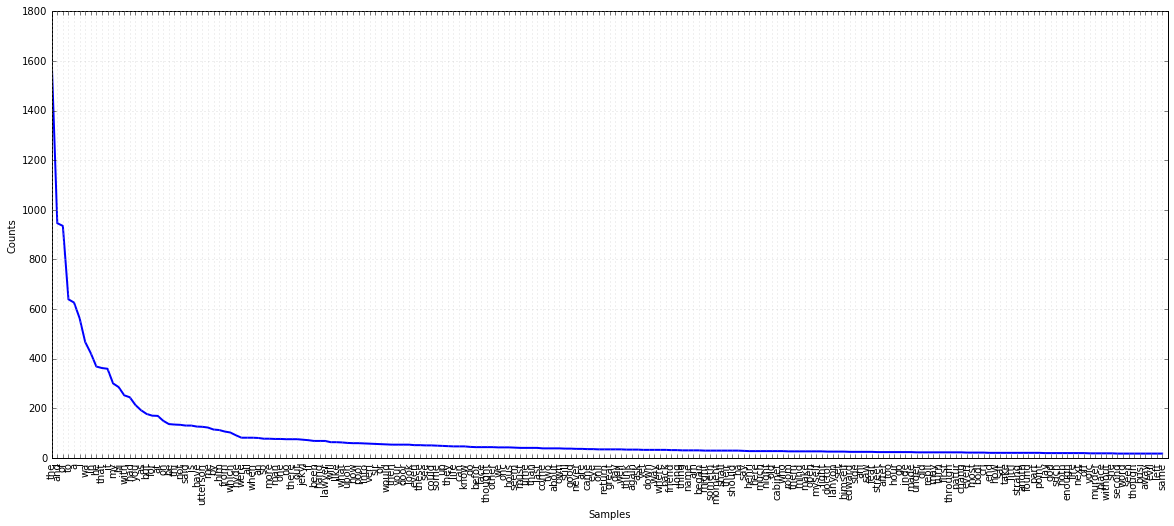

In [17]:
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure(figsize=(20, 8))
fd.plot(200, cumulative=False)

### 5.  Does the observed relative frequency of these words follow Zipf’s law? Explain.

In [18]:
import pandas as pd
import numpy as np

df = pd.DataFrame()

In [19]:
df['freq'] = fd_val

In [20]:
df = df[0:200]

In [21]:
df['rank'] = df['freq'].rank(ascending=False)

In [22]:
df['prop'] = df['freq'] / df['rank']
df.head()

,freq,rank,prop
0,1602,1,1602.000000
1,946,2,473.000000
2,935,3,311.666667
3,639,4,159.750000
4,626,5,125.200000


In [23]:
new= df[['freq', 'prop']]

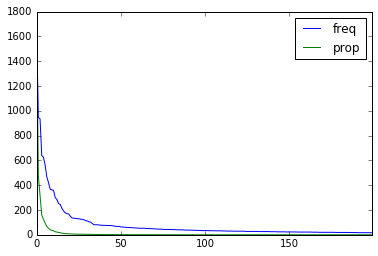

In [24]:
new.plot()


##### They do seem to be related, yes

### 7.  In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

##### I would imagine that the words would be somewhat similar. There are probably more violent words and old-timey language than many other texts, but the general language should be similar 